# Amostragem

O objetivo deste notebook é ser um resumo para meus estudos sobre o assunto de amostragem, de forma que seja aplicado os conceitos aprendidos em um dataset e agir como instrumento de consulta futura

O dataset utilizado esta disponível no [kaggle](https://www.kaggle.com/datasets/omkargowda/football-players-stats-premier-league-20212022), o qual contém estatísticas de jogadores de futebol da Premier League (2021-2022)

## Importando as Bibliotecas e Conhecendo o Dataset

In [1]:
# Importando as Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Carregando o dataset
fpstats = pd.read_csv('Football Players Stats (Premier League 2021-2022).csv',encoding='ISO-8859-1')

In [3]:
fpstats.head()

,Player,Team,Nation,Pos,Age,MP,Starts,Min,90s,Gls,...,G+A-PK,xG,npxG,xA,npxG+xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA.1
0,Bukayo Saka,Arsenal,eng ENG,"FW,MF",19.0,38,36,"2,978",33.1,11.0,...,0.48,9.7,8.2,6.9,15.2,0.29,0.21,0.50,0.25,0.46
1,Gabriel Dos Santos,Arsenal,br BRA,DF,23.0,35,35,"3,063",34.0,5.0,...,0.15,2.7,2.7,0.8,3.5,0.08,0.02,0.10,0.08,0.10
2,Aaron Ramsdale,Arsenal,eng ENG,GK,23.0,34,34,"3,060",34.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
3,Ben White,Arsenal,eng ENG,DF,23.0,32,32,"2,880",32.0,0.0,...,0.00,1.0,1.0,0.6,1.6,0.03,0.02,0.05,0.03,0.05
4,Martin Ødegaard,Arsenal,no NOR,MF,22.0,36,32,"2,785",30.9,7.0,...,0.36,4.8,4.8,6.8,11.6,0.16,0.22,0.38,0.16,0.38


In [4]:
fpstats.tail()

,Player,Team,Nation,Pos,Age,MP,Starts,Min,90s,Gls,...,G+A-PK,xG,npxG,xA,npxG+xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA.1
686,Christian Marques,Wolverhampton Wanderers,ch SUI,DF,18.0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
687,Yerson Mosquera,Wolverhampton Wanderers,co COL,DF,20.0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
688,Louie Moulden,Wolverhampton Wanderers,eng ENG,GK,19.0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
689,Dion Sanderson,Wolverhampton Wanderers,eng ENG,DF,21.0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
690,James Storer,Wolverhampton Wanderers,NaN,GK,NaN,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
fpstats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691 entries, 0 to 690
Data columns (total 30 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Player     691 non-null    object 
 1   Team       691 non-null    object 
 2   Nation     688 non-null    object 
 3   Pos        691 non-null    object 
 4   Age        687 non-null    float64
 5   MP         691 non-null    int64  
 6   Starts     691 non-null    int64  
 7   Min        546 non-null    object 
 8   90s        547 non-null    float64
 9   Gls        547 non-null    float64
 10  Ast        547 non-null    float64
 11  G-PK       547 non-null    float64
 12  PK         547 non-null    float64
 13  PKatt      547 non-null    float64
 14  CrdY       547 non-null    float64
 15  CrdR       547 non-null    float64
 16  Gls.1      546 non-null    float64
 17  Ast.1      546 non-null    float64
 18  G+A        546 non-null    float64
 19  G-PK.1     546 non-null    float64
 20  G+A-PK    

## População e Amostra

Quando se faz um estudo sobre determinado assunto, muito raramente o pesquisador têm acesso a todos os dados referentes à observação estudada, ou por falta de ocorrências ou por ser muito inviável financeiramente realizar a coleta desses dados, para isso, utilizamos a amostragem.

Por exemplo, para realizar as pesquisas sobre as intenções de voto é impossível perguntar a mais de 200 milhões de brasileiros, assim, é selecionado um pequeno grupo para responder às perguntas. Outro exemplo, é se estivéssemos observando a durabilidade de lâmpadas e testássemos todas até queimarem, não restaria nenhuma para ser vendida. Assim, a solução é selecionar parte dos elementos (amostra), analisá-la e inferir propriedadespara o todo (população).

O livro do *Morettin e Bussab* tem como definição:

* **População** é o conjunto de todos os elementos ou resultados sob investigação

* **Amostra** é qualquer subconjunto da população

Assim, quando selecionamos um grupo menor de uma população para analisar com o intuito de saber como a população se comporta, estamos **amostrando** (sampling).

## Erro de amostragem

Quando amostramos, os dados que obtemos podem ser mais ou menos semelhantes aos dados da população. Porém, sempre há alguma diferença entre as métricas de uma população e as métricas de uma amostra. Podemos ver essa diferença como um erro e, por ser o resultado da amostragem, chamamos isso de **erro de amostragem**.

Chamamos o número que descreve uma população inteira (por exemplo, média populacional) como um **parâmetro**, enquanto um número que descreve uma amostra (por exemplo, média da amostra) como uma **estatística**.

Outra maneira de pensar no erro de amostragem é como a diferença entre um parâmetro e uma estatística:

    erro de amostragem = parâmetro - estatística

Para exemplificar vamos medir o erro de amostragem usando nosso dataset

In [6]:
# Primeiro encontramos o número máximo de jogos disputados por um jogador
parameter = fpstats['MP'].max()

# Criamos uma amostra aleatoria com 30 jogadores da população
sample = fpstats['MP'].sample(30, random_state=2)

# Encontramos o número máximo de jogos disputados por um jogador na nossa amostra
statistic = sample.max()

# Medimos o erro de amostragem
sampling_error = parameter - statistic
sampling_error

3

Quando amostramos, queremos minimizar o erro de amostragem o máximo possível. Queremos que nossa amostra represente a população com a maior precisão possível. Assim, nossas amostras precisam representar suas populações correspondentes, quanto mais representativa for uma amostra, menor será o erro amostral e vice versa.

Para tornar nossas amostras representativas, podemos tentar dar a cada indivíduo da população uma chance igual de seleção em nossas amostras. Queremos que um indivíduo muito alto tenha a mesma chance de ser selecionado como um indivíduo baixo. Para dar a cada indivíduo uma chance igual de seleção, precisamos amostrar aleatoriamente.

Uma maneira de realizar a amostragem aleatória é gerar números aleatórios e usá-los para selecionar algumas unidades amostrais da população. Em estatística, esse método de amostragem é chamado de **amostragem aleatória simples**, muitas vezes abreviada como **AAS**.

O método `Series.sample()`, utilizado no exemplo anterior, executa uma amostragem aleatória simples gerando uma matriz de números aleatórios e, em seguida, usando esses números para selecionar valores de uma série nos índices correspondentes a esses números aleatórios. E utilizamos o parâmetro `random_state` para tornar previsível a geração de números aleatórios, o que torna possível a reprodução das amostras permitindo a reprodutibilidade dos experimentos.

De forma a visualizar a discrepância entre um parâmetro populacional e suas estatísticas amostrais correspondentes, no caso de amostragem aleatória simples, vamos criar um gráfico para exemplificar.

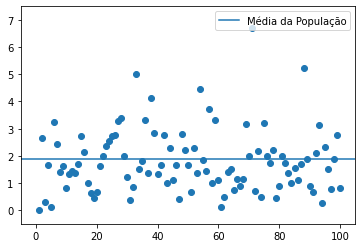

In [7]:
# Primeiro criamos uma lista vazia onde serão armazenadas as médias das amostras
sample_means = []

# Usando a amostragem aleatória simples, pegamos 100 amostras de 10 valores e para cada amostra
# medimos a média de idade.
for i in range(0, 100):
    sample = fpstats['Gls'].sample(10, random_state=i)
    sample_means.append(sample.mean())

# Por último criamos um gráfico, onde os pontos representam a média de idade de cada amostra
# e a linha representa a média da população
plt.scatter(x=range(1,101), y=sample_means)
plt.axhline(y=fpstats['Gls'].mean(), label='Média da População')
plt.legend(loc='upper right')
plt.xlim(-5,105)
plt.ylim(-0.5,7.5)
plt.show()

Pelo gráfico de dispersão, percebemos que as médias amostrais variam muito em torno da média populacional, por essa razão, existe uma boa chance de obtermos uma amostra que não seja representativa da população.

Podemos resolver esse problema aumentando o tamanho da amostra. À medida que aumentamos o tamanho da amostra, as médias amostrais variam menos em torno da média populacional e as chances de obter uma amostra não representativa diminuem.

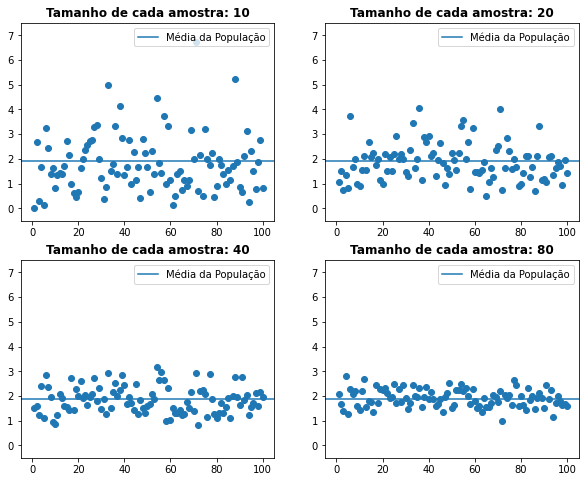

In [8]:
# Plotando gráficos para tamanhos de amostras diferentes

sample_means = []
sample_size = [10, 20, 40, 80]
grid = [221, 222, 223, 224]

plt.figure(figsize=(10,8))
for size, g in zip(sample_size, grid):
    
    for i in range(0, 100):
        sample = fpstats['Gls'].sample(size, random_state=i)
        sample_means.append(sample.mean())
    
    plt.subplot(g)
    plt.scatter(x=range(1,101), y=sample_means)
    plt.axhline(y=fpstats['Gls'].mean(), label='Média da População')
    plt.legend(loc='upper right')
    plt.title(f'Tamanho de cada amostra: {size}', fontweight='bold')
    plt.xlim(-5,105)
    plt.ylim(-0.5,7.5)
    sample_means = []

Podemos ver como as médias amostrais variam menos em torno da média populacional à medida que aumentamos o tamanho da amostra. Logo:

* A amostragem aleatória simples não é um método de amostragem confiável quando o tamanho da amostra é pequeno. Como as médias amostrais variam muito em torno da média populacional, há uma boa chance de obtermos uma amostra não representativa.

* Quando fazemos uma amostragem aleatória simples, devemos tentar obter uma amostra tão grande quanto possível. Uma amostra grande diminui a variabilidade do processo de amostragem, o que, por sua vez, diminui as chances de obtermos uma amostra não representativa.


## Amostragem Estratificada

Como a amostragem aleatória simples é inteiramente aleatória, ela pode excluir certos indivíduos da população que são relevantes para algumas de nossas perguntas.

Por exemplo, os jogadores de basquete jogam em diferentes posições na quadra. As métricas de um jogador (número de pontos, número de assistências, etc.) dependem de sua posição, e podemos querer analisar os padrões para cada posição individual. Se realizarmos uma amostragem aleatória simples, há uma chance de que nossa amostra não inclua algumas categorias. Em outras palavras, não é garantido que teremos uma amostra representativa com observações para cada posição que queremos analisar.

Para garantir que tenhamos uma amostra que tenha observações para todas as categorias de interesse, podemos organizar nosso conjunto de dados em diferentes grupos e, em seguida, fazer uma amostragem aleatória simples para cada grupo. Chamamos esse método de amostragem de **amostragem estratificada** e chamamos cada grupo estratificado de **estrato**.

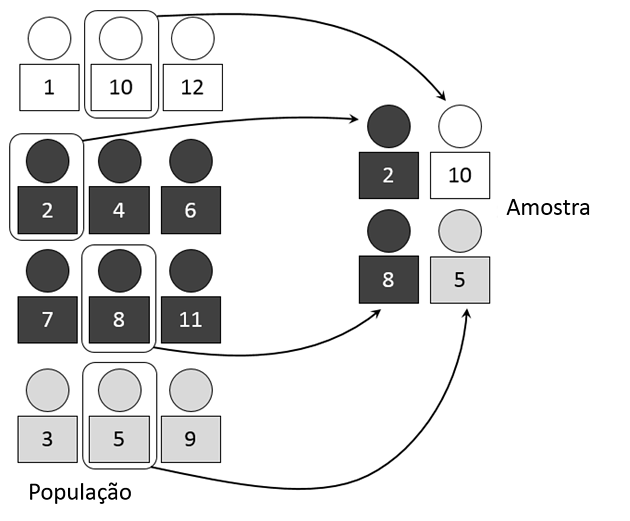

Vamos realizar uma amostragem estratificada: dividir o conjunto de dados por posição e, em seguida, fazer uma amostragem aleatória simples em cada posição.

In [9]:
# Criando a coluna gols por partida
fpstats['Gls_per_macth'] = fpstats['Gls'] / fpstats['MP']

# Estratificando os dados em cinco estratos
stratum_GK = fpstats[fpstats.Pos == 'GK']
stratum_DF = fpstats[fpstats.Pos == 'DF']
stratum_MF = fpstats[fpstats.Pos == 'MF']
stratum_FW = fpstats[fpstats.Pos == 'FW']

goals_per_position = {}
for stratum, position in [(stratum_GK,'GK'), (stratum_DF,'DF'),
                          (stratum_MF,'MF'), (stratum_FW,'FW')]:
    
    # Amostragem aleatória simples em cada estrato
    sample = stratum['Gls_per_macth'].sample(10, random_state = 0)
    goals_per_position[position] = sample.mean()
    
position_most_goals = max(goals_per_position, key = goals_per_position.get)
print(goals_per_position)
print(position_most_goals)

{'GK': 0.0, 'DF': 0.04301164829771494, 'MF': 0.024080267558528427, 'FW': 0.14927470190628084}
FW


### Amostra estratificada proporcional

Quando selecionamos uma característica dos indivíduos para definir camadas, frequentemente o tamanho resultante das subpopulações do universo são diferentes, o que pode resultar em uma média amostral que subestima ou superestima a média populacional.

Uma solução para esse problema é usar a amostragem estratificada, tendo em mente as proporções na população. Podemos estratificar nosso conjunto de dados pelo número de jogos disputados e, em seguida, amostrar aleatoriamente de cada estrato um número proporcional de observações. 

In [10]:
fpstats['Min'] = fpstats['Min'].str.replace(',','').astype(float)

In [11]:
print(fpstats['Min'].value_counts(bins = 3, normalize=True) * 100)

(-2.42, 1140.667]       35.890014
(1140.667, 2280.333]    25.470333
(2280.333, 3420.0]      17.655572
Name: Min, dtype: float64


Percebemos que a quantidade de minutos jogados dos jogadores varia de 0 a 3420 minutos. E aproximadamente 35,89% dos jogadores jogaram entre 0 e 1140 minutos, o que significa que esta categoria de jogadores que possuem essa minutagem provavelmente influenciam mais a média populacional, assim, se uma amostra dispor de muito mais jogadores dessa categoria pode levar a média amostral para longe da média populacional.

Então, realizamos uma amostragem estratificada proporcional para demonstrar a diferença das amostras em relação a amostragem aleatória simples. 

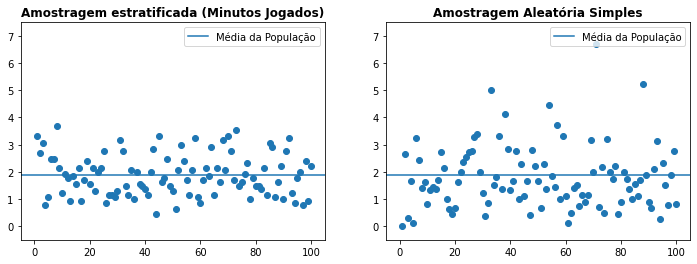

In [12]:
under_1140 = fpstats[fpstats['Min'] <= 1140.667]
btw_1140_2280 = fpstats[ (fpstats['Min'] > 1140.667) & (fpstats['Min'] <= 2280.333) ]
over_2280 = fpstats[fpstats['Min'] > 2280.333]

plt.figure(figsize=(12,4))

proportional_sampling_means = []

for i in range(100):
    sample_under_1140 = under_1140['Gls'].sample(6, random_state = i)
    sample_btw_1140_2280 =btw_1140_2280['Gls'].sample(4, random_state = i)
    sample_over_2280 = over_2280['Gls'].sample(3, random_state = i)
    
    final_sample = pd.concat([sample_under_1140, sample_btw_1140_2280, sample_over_2280])
    proportional_sampling_means.append(final_sample.mean())
plt.subplot(1,2,1)
plt.scatter(range(1,101), proportional_sampling_means)
plt.axhline(fpstats['Gls'].mean(), label='Média da População')
plt.legend(loc='upper right')
plt.xlim(-5,105)
plt.ylim(-0.5,7.5)
plt.title('Amostragem estratificada (Minutos Jogados)', fontweight='bold')


# Primeiro criamos uma lista vazia onde serão armazenadas as médias das amostras
sample_means = []

# Usando a amostragem aleatória simples, pegamos 100 amostras de 10 valores e para cada amostra
# medimos a média de idade.
for i in range(0, 100):
    sample = fpstats['Gls'].sample(10, random_state=i)
    sample_means.append(sample.mean())

# Por último criamos um gráfico, onde os pontos representam a média de idade de cada amostra
# e a linha representa a média da população
plt.subplot(1,2,2)
plt.scatter(x=range(1,101), y=sample_means)
plt.axhline(y=fpstats['Gls'].mean(), label='Média da População')
plt.legend(loc='upper right')
plt.xlim(-5,105)
plt.ylim(-0.5,7.5)
plt.title('Amostragem Aleatória Simples', fontweight='bold')
plt.show()

Se compararmos os gráfico percebemos que esta amostragem proporcional se encaixou muito melhor com os dados, trazendo a média amostral para mais perto da média populacional.

Algumas boas diretrizes para escolher bons estratos:
1. Minimizar a variabilidade dentro de cada estrato.
    * Por exemplo, evitar ter no mesmo estrato um jogador que marcou 10 pontos e um jogador que marcou 500.
2. Maximizar a variabilidade entre os estratos.
    * Bons estratos são diferentes uns dos outros.
3. O critério de estratificação deve se correlacionar fortemente com a propriedade que você está tentando medir.
    * Por exemplo, a coluna que descreve os minutos jogados (o critério) deve estar fortemente correlacionada com o número total de gols (propriedade que queremos medir).

## Cluster Sampling

Na amostragem por conglomerados, os pesquisadores dividem uma população em grupos menores conhecidos como conglomerados. Eles então selecionam aleatoriamente entre esses grupos para formar uma amostra.

A amostragem por conglomerados é um método de amostragem probabilística que é frequentemente usado para estudar grandes populações, particularmente aquelas que estão amplamente dispersas geograficamente. Os pesquisadores geralmente usam unidades pré-existentes, como escolas ou cidades, como seus clusters.

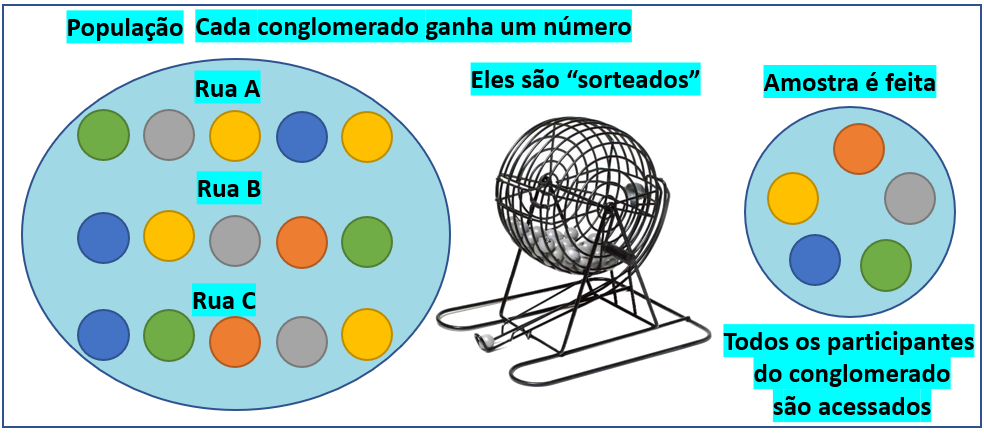

In [13]:
clusters = pd.Series(fpstats['Team'].unique()).sample(4, random_state = 0)

sample = pd.DataFrame()

for cluster in clusters:
    data_collected = fpstats[fpstats['Team'] == cluster]
    sample = pd.concat([sample, data_collected])

sampling_error_age = fpstats['Age'].mean() - sample['Age'].mean()
sampling_error_Min = fpstats['Min'].mean() - sample['Min'].mean()
sampling_error_Gls = fpstats['Gls'].mean() - sample['Gls'].mean()

print(sampling_error_age)
print(sampling_error_Min)
print(sampling_error_Gls)

0.55623200416494
22.88105138105152
0.2440095325150171


## Amostragem na prática de ciência de dados

Digamos que você trabalhe para uma empresa de comércio eletrônico que tenha uma tabela em um banco de dados com mais de 10 milhões de linhas de transações online. A equipe de marketing solicita que você analise os dados e encontre categorias de clientes com baixa taxa de compra, para que possam direcionar suas campanhas de marketing para as pessoas certas. Em vez de trabalhar com mais de 10 milhões de linhas em cada etapa de sua análise, você pode economizar muito tempo de execução de código amostrando várias centenas de linhas e realizando sua análise na amostra. Você pode fazer uma amostragem aleatória simples, mas se estiver interessado em algumas categorias de antemão, pode ser uma boa ideia usar a amostragem estratificada.

A análise estatística prática gira inteiramente em torno da distinção entre uma população e uma amostra. Quando estamos fazendo estatísticas na prática, nosso objetivo é descrever uma amostra ou uma população ou usar uma amostra para tirar conclusões sobre a população à qual ela pertence (ou uma mistura desses dois objetivos).

## Principais Referências

* Dataquest.io
* [Sampling (statistics)](https://en.wikipedia.org/wiki/Sampling_(statistics)#Sampling_methods)
* Livro Estatística Básica do Bussab e Morettin, 6ª Edição